In [54]:
import pandapower as pp
from pandapower.plotting.plotly import simple_plotly
import pandas as pd
# creating network
net = pp.create_empty_network() 
#A local excel file that contains all information is used

In [55]:
#create 18 buses
bus_df=pd.read_excel('Balearic_islands_my_stuff.xlsx',sheet_name=0)

b = []

for i in bus_df['bus_id']:
    b.append(pp.create_bus(net, vn_kv = bus_df.loc[bus_df['bus_id']==i, 'vn_kv'].values[0], name = bus_df.loc[bus_df['bus_id']==i, 'name'].values[0], geodata = eval(bus_df.loc[bus_df['bus_id']==i, 'geodata'].values[0])))
    

In [56]:
# create the grid connection point to mainland
connect_bus = b[1]
vm_pu = 1

pp.create_ext_grid(net, bus=connect_bus, vm_pu=vm_pu, name = "Slack bus")


0

In [57]:
net.bus

,name,vn_kv,type,zone,in_service
0,Ibiza (+ Formentura),132.0,b,None,True
1,Santa Ponca (132),132.0,b,None,True
2,Santa Ponca (220),220.0,b,None,True
3,Valldurgent,220.0,b,None,True
4,Son Reus,220.0,b,None,True
5,Portol (Cas Tresorer) (220),220.0,b,None,True
6,Portol (Cas Tresorer) (66),66.0,b,None,True
7,Son Orlandis,220.0,b,None,True
8,Llubi,220.0,b,None,True
9,Murterar,220.0,b,None,True


In [58]:
# create trafos

# bus 1 Santa Ponca (132) / bus 2 Santa Ponca (220)
#hv_bus = b[2]
#lv_bus = b[1]
# used parameters from 100 MVA 220/110 kV standard type
#sn_mva = 450      ###check
#vn_hv_kv = 132
#vn_lv_kv = 220
#vk_percent = 12
#vkr_percent = 0.26
#pfe_kw = 55
#i0_percent = 0.06 
#pp.create_transformer(net, hv_bus=b[2], lv_bus=b[1], std_type='100 MVA 220/110 kV')
pp.create_transformer_from_parameters(net, hv_bus=b[2], lv_bus=b[1], sn_mva=450, vn_hv_kv=220, vn_lv_kv=132, vkr_percent=0.26, vk_percent=12, pfe_kw=55, i0_percent=0.06)


# bus 5 Portol (Cas Tresorer) (220) / bus 6 Portol (Cas Tresorer) (66)
#hv_bus = b[5]
#lv_bus = b[6]

# from gyubin's pdf
#sn_mva = 125
#vn_hv_kv = 220
#vn_lv_kv = 66
# used parameters from 100 MVA 220/110 kV standard type
#vk_percent = 12
#vkr_percent = 0.26
#pfe_kw = 55
#i0_percent = 0.06
#pp.create_transformer(net, hv_bus=b[5], lv_bus=b[6], std_type='100 MVA 220/110 kV')
#pp.create_transformer_from_parameters(net, hv_bus=hv_bus, lv_bus=lv_bus, sn_mva=sn_mva, vn_hv_kv=vn_hv_kv, vn_lv_kv=vn_lv_kv, vkr_percent=vkr_percent, vk_percent=vk_percent, pfe_kw=pfe_kw, i0_percent=i0_percent)
pp.create_transformer_from_parameters(net, hv_bus=b[5], lv_bus=b[6], sn_mva=125, vn_hv_kv=220, vn_lv_kv=66, vkr_percent=0.26, vk_percent=12, pfe_kw=55, i0_percent=0.06)


# bus 10 Es Bessons (220) /  bus 11 Es Bessons (132)
#hv_bus = b[10]
#lv_bus = b[11]
# used parameters from 100 MVA 220/110 kV standard type
#sn_mva = 320      ###check
#vn_hv_kv = 220
#vn_lv_kv = 132
#vk_percent = 12
#vkr_percent = 0.26
#pfe_kw = 55
#i0_percent = 0.06
#pp.create_transformer(net, hv_bus=b[10], lv_bus=b[11], std_type='100 MVA 220/110 kV')
pp.create_transformer_from_parameters(net, hv_bus=b[10], lv_bus=b[11], sn_mva=320, vn_hv_kv=220, vn_lv_kv=132, vkr_percent=0.26, vk_percent=12, pfe_kw=55, i0_percent=0.06)



2

In [59]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,...,tap_neutral,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service
0,None,None,2,1,450.0,220.0,132.0,12.0,0.26,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True
1,None,None,5,6,125.0,220.0,66.0,12.0,0.26,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True
2,None,None,10,11,320.0,220.0,132.0,12.0,0.26,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True


In [60]:

#create the lines
line_df=pd.read_excel('Balearic_islands_my_stuff.xlsx',sheet_name=5)

l = []


for i in line_df.index:
    pp.create_line_from_parameters(net, 
                                 from_bus=b[int(line_df.loc[i, 'from_bus'])],
                                 to_bus=b[int(line_df.loc[i, 'to_bus'])],
                                 length_km=line_df.loc[i, 'length_km'],
                                 r_ohm_per_km=line_df.loc[i, 'r_ohm_per_km'],
                                 x_ohm_per_km=line_df.loc[i, 'x_ohm_per_km'],
                                 c_nf_per_km=line_df.loc[i, 'c_nf_per_km'],
                                 max_i_ka=line_df.loc[i, 'max_i_ka'],
                                 geodata=[eval(line_df.loc[i,'geo_from']),eval(line_df.loc[i,'geo_to'])])
    

In [61]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,None,0,1,126.000000,0.088333,0.131880,1.600000e-09,0.0,0.430,1.0,1,None,True
1,None,None,2,3,5.599701,0.446233,0.360075,1.000000e-09,0.0,0.195,1.0,1,None,True
2,None,None,3,4,15.025144,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
3,None,None,3,4,14.897672,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
4,None,None,4,7,9.417888,0.446233,0.367368,1.000000e-09,0.0,0.145,1.0,1,None,True
5,None,None,4,8,33.830450,0.446233,0.367368,1.000000e-09,0.0,0.145,1.0,1,None,True
6,None,None,7,5,4.357733,0.047800,0.349157,1.000000e-09,0.0,0.645,1.0,1,None,True
7,None,None,7,8,28.906206,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
8,None,None,8,9,16.770224,0.071533,0.338241,1.000000e-09,0.0,0.490,1.0,1,None,True
9,None,None,8,9,16.063570,0.071533,0.338241,1.000000e-09,0.0,0.490,1.0,1,None,True


In [62]:
# create the loads

load_df=pd.read_excel('Balearic_islands_my_stuff.xlsx',sheet_name=1)


p_mw_s = 'summer_p_mw'
q_mvar_s = 'summer_q_mvar'

for i in load_df['bus_id']:
    pp.create_load(net, 
                 b[i], 
                 p_mw=load_df.loc[load_df['bus_id']==i, p_mw_s].values[0], 
                 q_mvar=load_df.loc[load_df['bus_id']==i, q_mvar_s].values[0])

In [63]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,None,0,175.429591,84.964429,0.0,0.0,NaN,1.0,True,wye
1,None,1,113.054626,54.754854,0.0,0.0,NaN,1.0,True,wye
2,None,3,113.054626,54.754854,0.0,0.0,NaN,1.0,True,wye
3,None,4,113.054626,54.754854,0.0,0.0,NaN,1.0,True,wye
4,None,6,113.054626,54.754854,0.0,0.0,NaN,1.0,True,wye
5,None,7,113.054626,54.754854,0.0,0.0,NaN,1.0,True,wye
6,None,8,113.054626,54.754854,0.0,0.0,NaN,1.0,True,wye
7,None,9,113.054626,54.754854,0.0,0.0,NaN,1.0,True,wye
8,None,11,113.054626,54.754854,0.0,0.0,NaN,1.0,True,wye
9,None,12,113.054626,54.754854,0.0,0.0,NaN,1.0,True,wye


In [64]:
# create the solar generators

gen_df=pd.read_excel('Balearic_islands_my_stuff.xlsx',sheet_name=8)


  
for i in gen_df['bus_connection']:
    pp.create_gen(net, 
                b[i], 
                p_mw = gen_df.loc[gen_df['bus_connection']==i, 'sensible_gen'].values[0], 
                vm_pu=vm_pu,   # defined above
                name= gen_df.loc[gen_df['bus_connection']==i,'name'].values[0])
   

In [65]:
net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,type
0,Llubi,8,224.655172,1.0,NaN,NaN,NaN,1.0,False,True,None
1,Murterar,9,202.189655,1.0,NaN,NaN,NaN,1.0,False,True,None
2,Es Bessons (220),10,202.189655,1.0,NaN,NaN,NaN,1.0,False,True,None
3,Cala en Bosch,13,336.982759,1.0,NaN,NaN,NaN,1.0,False,True,None
4,Cuitadella,14,336.982759,1.0,NaN,NaN,NaN,1.0,False,True,None


In [66]:
pp.runpp(net, algorithm='gs')

In [67]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,None,0,1,126.000000,0.088333,0.131880,1.600000e-09,0.0,0.430,1.0,1,None,True
1,None,None,2,3,5.599701,0.446233,0.360075,1.000000e-09,0.0,0.195,1.0,1,None,True
2,None,None,3,4,15.025144,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
3,None,None,3,4,14.897672,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
4,None,None,4,7,9.417888,0.446233,0.367368,1.000000e-09,0.0,0.145,1.0,1,None,True
5,None,None,4,8,33.830450,0.446233,0.367368,1.000000e-09,0.0,0.145,1.0,1,None,True
6,None,None,7,5,4.357733,0.047800,0.349157,1.000000e-09,0.0,0.645,1.0,1,None,True
7,None,None,7,8,28.906206,0.142167,0.349157,1.000000e-09,0.0,0.295,1.0,1,None,True
8,None,None,8,9,16.770224,0.071533,0.338241,1.000000e-09,0.0,0.490,1.0,1,None,True
9,None,None,8,9,16.063570,0.071533,0.338241,1.000000e-09,0.0,0.490,1.0,1,None,True


In [68]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-175.429591,-84.964429,222.373649,155.051021,46.944058,70.086592,1.185720,1.185720,1.185720,0.719024,-9.044376,1.000000,0.000000,275.748810
1,-135.305901,214.402440,139.068314,-211.366471,3.762413,3.035969,0.708450,0.708450,0.708450,0.939144,2.276616,0.937241,3.364126,363.307661
2,-125.524446,77.972225,126.621539,-75.277802,1.097092,2.694423,0.413764,0.413764,0.413764,0.937241,3.364126,0.934311,4.479587,140.258991
3,-126.598493,78.639392,127.704973,-75.921915,1.106479,2.717477,0.417304,0.417304,0.417304,0.937241,3.364126,0.934311,4.479587,141.459114
4,-131.543133,35.803511,133.391811,-34.281559,1.848678,1.521952,0.382924,0.382924,0.382924,0.934311,4.479587,0.943892,5.292516,264.085295
5,-235.838004,60.641352,257.025215,-43.198664,21.187211,17.442688,0.683977,0.683977,0.683977,0.934311,4.479587,1.000000,9.359112,471.708147
6,113.623651,75.491137,-113.533757,-74.834508,0.089893,0.656629,0.379279,0.379279,0.379279,0.943892,5.292516,0.940866,5.083026,58.802968
7,-360.070087,-95.964432,373.303605,128.465520,13.233518,32.501088,1.036054,1.036054,1.036054,0.943892,5.292516,1.000000,9.359112,351.204910
8,-43.559137,9.333658,43.608325,-9.101077,0.049188,0.232581,0.116908,0.116908,0.116908,1.000000,9.359112,1.000000,9.664866,23.858760
9,-45.475353,9.744256,45.526705,-9.501444,0.051352,0.242812,0.122051,0.122051,0.122051,1.000000,9.359112,1.000000,9.664866,24.908334


In [16]:
net.res_load

,p_mw,q_mvar
0,175.429591,84.964429
1,113.054626,54.754854
2,113.054626,54.754854
3,113.054626,54.754854
4,113.054626,54.754854
5,113.054626,54.754854
6,113.054626,54.754854
7,113.054626,54.754854
8,113.054626,54.754854
9,113.054626,54.754854


In [17]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,4.272292,-55.270409,34.106473
1,1.000000,0.000000,96.459218,-63.535137
2,0.993586,0.683526,0.000000,0.000000
3,0.994849,0.862856,113.054625,54.754854
4,1.000000,1.312770,-189.962632,-64.740813
5,1.000000,1.747034,-280.052918,-118.024460
6,0.934608,-4.851206,113.054626,54.754854
7,0.997854,1.457699,113.054626,54.754854
8,0.989228,0.903017,113.054626,54.754854
9,1.000000,1.659873,-256.475200,-135.141812


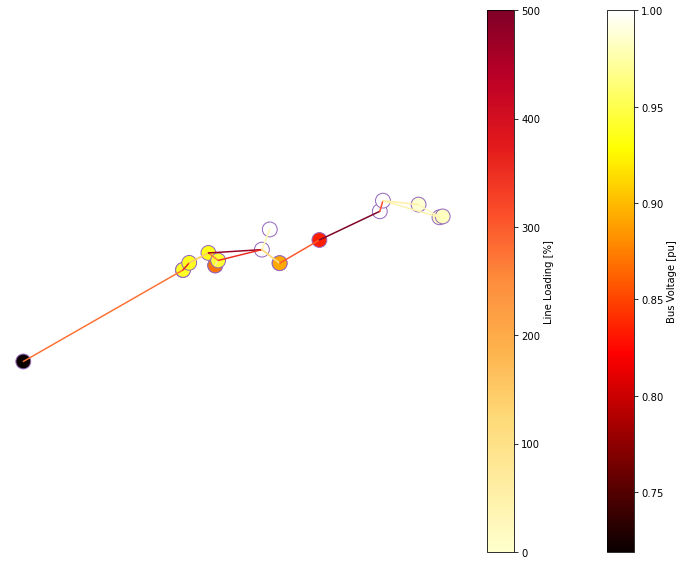

In [70]:
#plot the network, lines and buses results
import seaborn
import matplotlib.pyplot as plt

colors = seaborn.color_palette(palette=None, n_colors=None, desat=None, as_cmap=True)

bc = pp.plotting.create_bus_collection(net, buses=net.res_bus.index, size=.05, patch_type='circle', color=colors[4], cmap='hot', norm=None, \
                                       infofunc=None, picker=False, bus_geodata=None, cbar_title='Bus Voltage [pu]')

lc = pp.plotting.create_line_collection(net, lines=net.res_line.index, color=None, line_geodata=None, bus_geodata=None, use_bus_geodata=False,\
                                        infofunc=None, cmap='YlOrRd', norm=None, picker=False, z=None, cbar_title='Line Loading [%]', clim=(0,500), plot_colormap=True)


pp.plotting.draw_collections([bc, lc])

plt.show()


In [69]:
import geopandas as gpd
from pandapower import plotting
from pandapower.plotting import simple_plotly, pf_res_plotly
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import math
import numba




In [71]:
#export the results into the shapefile needed for QGIS using geopandas
pd_line = pd.DataFrame(net.line_geodata)

pd_bus = pd.DataFrame(net.res_bus)

gdf_busloc = gpd.GeoDataFrame(net.bus_geodata, geometry=gpd.points_from_xy(net.bus_geodata.x, net.bus_geodata.y))


pd_bus['geometry'] = gdf_busloc['geometry']

gdf_businfo = gpd.GeoDataFrame(pd_bus, crs="EPSG:4326")



l1 = [*range(0, 19, 1)]
l2 = [*range(0, 19, 1)]


for i in range(0,19) :
    l1[i] = LineString(pd_line['coords'][i])
    l2[i] = i
                    
d = {'col1': l2, 'geometry': l1}


df=pd.DataFrame(d)

pd_lineinfo = pd.DataFrame(net.res_line)

pd_lineinfo['geometry'] = df['geometry']


gdf_lineloc = gpd.GeoDataFrame(pd_lineinfo, crs="EPSG:4326") 

gdf_lineloc.to_file('lines_Pan_solar_final.shp')
gdf_businfo.to_file('bus_Pan_solar_final.shp')

C:\Users\Cloudsurfers\anaconda3\envs\geo_new\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\CLOUDS~1\AppData\Local\Temp/ipykernel_19968/3874559953.py:37: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_lineloc.to_file('lines_Pan_solar_final.shp')
